In [1]:
import sys 
sys.path.append('../..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.functions import get_moving_avg
from scipy.stats import mstats

# Yearly

In [3]:
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table['Year'] = range(1814, 2020)

AREA prev,0.55,0.4602



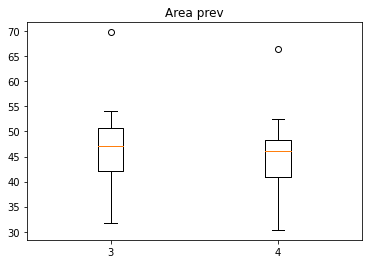

In [13]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]


kruskalwallis = mstats.kruskalwallis(list(c3['Area'].dropna()), list(c4['Area'].dropna()))
print(f"AREA prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
#print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
#plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
plt.boxplot([c3['Area'].dropna(), c4['Area'].dropna()], labels=['3', '4'])
plt.title("Area prev")
plt.show()

# Monthly

In [3]:
min_temp = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')
a_classified = pd.read_excel('../../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [4]:
min_temp = get_moving_avg(min_temp)

In [6]:
min_temp = min_temp[min_temp['Month']>4].reset_index(drop=True)
min_temp = min_temp[min_temp['Month']<10].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']>4].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']<10].reset_index(drop=True)

In [7]:
min_cumsum_prec = min_prec.cumsum()
min_cumsum_prec = get_moving_avg(min_cumsum_prec)
min_cumsum_prec['Month'] = min_prec['Month']
min_cumsum_prec['Week'] = min_prec['Week']
min_cumsum_prec['Day'] = min_prec['Day']

In [8]:
prec_max = max(min_cumsum_prec.max(skipna=True)[3:])
prec_min = min(min_cumsum_prec.min(skipna=True)[3:])

In [9]:
scaled_prec = (min_cumsum_prec - prec_min) / (prec_max - prec_min)
scaled_prec['Month'] = min_prec['Month']
scaled_prec['Week'] = min_prec['Week']
scaled_prec['Day'] = min_prec['Day']

In [10]:
temp_max = max(min_temp.max(skipna=True)[3:])
temp_min = min(min_temp.min(skipna=True)[3:])

In [12]:
scaled_temp = (min_temp - temp_min) / (temp_max - temp_min)
scaled_temp['Month'] = min_temp['Month']
scaled_temp['Week'] = min_temp['Week']
scaled_temp['Day'] = min_temp['Day']

In [13]:
scaled_temp

,Month,Day,1915,1916,1917,1918,1919,1920,1921,1922,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Week
0,5,1,0.391708,0.120934,0.231259,0.245403,0.230552,0.194837,0.213579,0.159123,...,0.250707,0.172560,0.262023,0.293847,0.195898,0.173267,0.193069,0.185644,NaN,18
1,5,2,0.353465,0.136492,0.231612,0.278642,0.210750,0.178571,0.225601,0.170438,...,0.206506,0.171499,0.305163,0.287482,0.211457,0.167963,0.191655,0.173975,NaN,18
2,5,3,0.330033,0.149576,0.223479,0.316124,0.188826,0.158416,0.218529,0.158416,...,0.169731,0.172560,0.338402,0.271570,0.230198,0.169024,0.193069,0.182815,NaN,18
3,5,4,0.332390,0.150636,0.235502,0.314356,0.146040,0.142857,0.208982,0.152405,...,0.152405,0.177511,0.340523,0.245050,0.222419,0.186704,0.209689,0.202617,NaN,18
4,5,5,0.324965,0.138260,0.243989,0.302334,0.094413,0.123055,0.188826,0.148868,...,0.146040,0.174328,0.321075,0.257426,0.223126,0.198373,0.222772,0.237624,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,9,26,0.232673,0.193777,0.242221,0.234088,0.130481,0.213579,0.232320,0.135431,...,0.231966,0.227016,0.225248,0.198727,0.114569,0.119873,0.172207,NaN,NaN,39
149,9,27,0.194484,0.167610,0.242928,0.235502,0.141089,0.226308,0.216761,0.136846,...,0.236917,0.196252,0.229844,0.216407,0.134724,0.120934,0.154880,NaN,NaN,39
150,9,28,0.158416,0.158416,0.253182,0.207214,0.144625,0.208982,0.206506,0.159477,...,0.250707,0.186704,0.221711,0.218883,0.143564,0.132603,0.129774,NaN,NaN,39
151,9,29,0.129420,0.162659,0.255304,0.210396,0.160184,0.183522,0.203678,0.187765,...,0.264851,0.165488,0.211810,0.206153,0.150636,0.170792,0.110679,NaN,NaN,39


# Weekly